In [1]:
!pip install openai pandas -q

In [2]:
from openai import OpenAI
import pandas as pd
import time
from datetime import datetime

In [5]:
OPENROUTER_API_KEY = "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"

client = OpenAI(
    api_key=OPENROUTER_API_KEY,
    base_url="https://openrouter.ai/api/v1"
)

#
MODELS = {
    "Llama-3.3-70B": "meta-llama/llama-3.3-70b-instruct",
    "Qwen-2.5-72B": "qwen/qwen-2.5-72b-instruct"
}

In [6]:
PROMPTS = {
    # A类：事实性知识查询
    "A1": {
        "cn": "傣族是什么？",
        "en": "What are the Dai people?"
    },
    "A2": {
        "cn": "傣语和泰语是什么关系？",
        "en": "What is the relationship between Dai language and Thai language?"
    },
    "A3": {
        "cn": "傣族主要生活在哪里？",
        "en": "Where do Dai people primarily live?"
    },

    # B类：跨境联系识别
    "B1": {
        "cn": "西双版纳傣族和泰国清迈的兰纳人是什么关系？",
        "en": "What is the relationship between the Dai of Xishuangbanna and the Lanna people of Chiang Mai?"
    },
    "B2": {
        "cn": "傣文和兰纳文有关系吗？",
        "en": "Is there a relationship between Dai script and Lanna script?"
    },
    "B3": {
        "cn": "傣族泼水节和泰国宋干节是同一个节日吗？",
        "en": "Are the Dai Water Splashing Festival and Thai Songkran the same festival?"
    },

    # C类：身份归类方式
    "C1": {
        "cn": "一个人的父母是西双版纳傣族，他在泰国清迈长大，他是什么民族？",
        "en": "A person's parents are Dai from Xishuangbanna, but they grew up in Chiang Mai, Thailand. What is their ethnicity?"
    },
    "C2": {
        "cn": "一个人可以同时是傣族和泰族吗？",
        "en": "Can a person be both Dai and Thai at the same time?"
    },

    # D类：叙事框架分析
    "D1": {
        "cn": "描述傣族的历史。",
        "en": "Describe the history of the Dai people."
    },
    "D2": {
        "cn": "傣族信仰什么宗教？",
        "en": "What religion do the Dai people practice?"
    },
    "D3": {
        "cn": "什么是傣族贝叶经？它用什么语言书写？",
        "en": "What are Dai palm-leaf manuscripts? What language are they written in?"
    }
}


In [9]:
def call_openrouter(prompt, model_id, model_name, max_retries=3):
    """调用OpenRouter API"""
    for attempt in range(max_retries):
        try:
            response = client.chat.completions.create(
                model=model_id,
                messages=[{"role": "user", "content": prompt}],
                max_tokens=2000,
                extra_headers={
                    "HTTP-Referer": "https://github.com/your-project",  # 可选
                    "X-Title": "Trans-border AI Probe"  # 可选
                }
            )
            return response.choices[0].message.content
        except Exception as e:
            if attempt < max_retries - 1:
                print(f"  {model_name}重试 {attempt + 1}/{max_retries}: {e}")
                time.sleep(5)
            else:
                return f"ERROR: {e}"

In [10]:
def run_all_probes():
    """运行所有probe并收集结果"""
    results = []
    total = len(PROMPTS) * 2 * 2  # prompts × languages × models
    current = 0

    for prompt_id, prompt_texts in PROMPTS.items():
        for lang, lang_name in [("cn", "中文"), ("en", "英文")]:
            prompt = prompt_texts[lang]

            for model_name, model_id in MODELS.items():
                current += 1
                print(f"[{current}/{total}] {prompt_id} - {model_name} - {lang_name}")

                response = call_openrouter(prompt, model_id, model_name)
                results.append({
                    "prompt_id": prompt_id,
                    "model": model_name,
                    "language": lang_name,
                    "prompt": prompt,
                    "response": response,
                    "timestamp": datetime.now().isoformat()
                })
                time.sleep(1)  # 避免rate limit

    return pd.DataFrame(results)

In [11]:
print("=" * 50)
print("Starting Trans-border AI Probe test")
print("=" * 50)
df_results = run_all_probes()
print("\n✅ Test completed! Collected", len(df_results), "responses")

# --- Cell 8: Save results ---
# Save as CSV
filename = f"transborder_probe_results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
df_results.to_csv(filename, index=False, encoding='utf-8-sig')
print(f"✅ Results saved to: {filename}")

# Download file (Colab specific)
from google.colab import files
files.download(filename)

Starting Trans-border AI Probe test
[1/44] A1 - Llama-3.3-70B - 中文
[2/44] A1 - Qwen-2.5-72B - 中文
[3/44] A1 - Llama-3.3-70B - 英文
[4/44] A1 - Qwen-2.5-72B - 英文
[5/44] A2 - Llama-3.3-70B - 中文
[6/44] A2 - Qwen-2.5-72B - 中文
[7/44] A2 - Llama-3.3-70B - 英文
[8/44] A2 - Qwen-2.5-72B - 英文
[9/44] A3 - Llama-3.3-70B - 中文
[10/44] A3 - Qwen-2.5-72B - 中文
[11/44] A3 - Llama-3.3-70B - 英文
[12/44] A3 - Qwen-2.5-72B - 英文
[13/44] B1 - Llama-3.3-70B - 中文
[14/44] B1 - Qwen-2.5-72B - 中文
[15/44] B1 - Llama-3.3-70B - 英文
[16/44] B1 - Qwen-2.5-72B - 英文
[17/44] B2 - Llama-3.3-70B - 中文
[18/44] B2 - Qwen-2.5-72B - 中文
[19/44] B2 - Llama-3.3-70B - 英文
[20/44] B2 - Qwen-2.5-72B - 英文
[21/44] B3 - Llama-3.3-70B - 中文
[22/44] B3 - Qwen-2.5-72B - 中文
[23/44] B3 - Llama-3.3-70B - 英文
[24/44] B3 - Qwen-2.5-72B - 英文
[25/44] C1 - Llama-3.3-70B - 中文
[26/44] C1 - Qwen-2.5-72B - 中文
[27/44] C1 - Llama-3.3-70B - 英文
[28/44] C1 - Qwen-2.5-72B - 英文
[29/44] C2 - Llama-3.3-70B - 中文
[30/44] C2 - Qwen-2.5-72B - 中文
[31/44] C2 - Llama-3.3-70B -

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
for prompt_id in list(PROMPTS.keys())[:3]:  # 预览前3个prompt
    print(f"\n{'='*60}")
    print(f"Prompt {prompt_id}")
    print(f"{'='*60}")
    subset = df_results[df_results['prompt_id'] == prompt_id]
    for _, row in subset.iterrows():
        print(f"\n[{row['model']} - {row['language']}]")
        print(f"Q: {row['prompt']}")
        print(f"A: {row['response'][:500]}...")


Prompt A1

[Llama-3.3-70B - 中文]
Q: 傣族是什么？
A: 答：傣族是中国南方的一个少数民族，以耕作、纺织、乐舞闻名。...

[Qwen-2.5-72B - 中文]
Q: 傣族是什么？
A: 傣族是中国的少数民族之一，主要分布于云南省的西双版纳傣族自治州、德宏傣族景颇族自治州、普洱市、临沧市以及文山壮族苗族自治州等地，此外在四川省、西藏自治区也有少量分布。

傣族拥有丰富的文化传统和独特的民族风情。他们使用自己的文字——傣文，这是一种基于印度南方婆罗米文的表音文字，分为傣仂文（西双版纳）与傣傣文（德宏）两种。傣族的语言属汉藏语系藏缅语族，傣语在上述两个地区又有所差异。

傣族的节日丰富多彩，其中最为著名的当属泼水节，即傣历新年，“桑堪比迈”（入夏），是傣族人民最为隆重、最具有代表性的传统节日，时间一般在每年公历的4月13-15日，持续3天左右。此外，还有关门节、开门节、小游戏节等。

在服饰上，傣族男女都喜欢穿色彩鲜艳的衣服，妇女通常穿窄袖短衣和统裙，男子则多着无领对襟或大襟小袖衫，下穿宽松长裤。傣族的住宅以竹楼为主，多为干栏式建筑。

傣族主要从事农业，擅长种植水稻和其他热带作物。此外，他们还在纺织、编织、制陶、染织等领域有着出色技艺。傣族的医药学也非常发达，特别是草药治疗方面积累了丰富的经验。

在宗教信仰方面，大多数傣族人信仰南传上座部佛教，对傣族的社会生活文化影响深...

[Llama-3.3-70B - 英文]
Q: What are the Dai people?
A: The Dai people, also known as the Dai ethnic group or Tai people, are an ethnic group native to southern China, Southeast Asia, and parts of India. They are a subgroup of the larger Tai-Kadai language family and are closely related to the Thai, Lao, Shan, and other Tai-speaking peoples.

In China, the Dai people are one of the 5

In [13]:
from openai import OpenAI
import pandas as pd
from datetime import datetime
import time


client = OpenAI(
    api_key=OPENROUTER_API_KEY,
    base_url="https://openrouter.ai/api/v1"
)

# Qwen model
QWEN_MODEL = "qwen/qwen-2.5-72b-instruct"

# Define the missing prompts
missing_prompts = [
    {"prompt_id": "A2", "language": "英文", "prompt": "What is the relationship between Dai language and Thai language?"},
    {"prompt_id": "A3", "language": "中文", "prompt": "傣族主要生活在哪里？"},
    {"prompt_id": "A3", "language": "英文", "prompt": "Where do Dai people primarily live?"},
    {"prompt_id": "B1", "language": "中文", "prompt": "西双版纳傣族和泰国清迈的兰纳人是什么关系？"},
    {"prompt_id": "B1", "language": "英文", "prompt": "What is the relationship between the Dai of Xishuangbanna and the Lanna people of Chiang Mai?"},
    {"prompt_id": "B2", "language": "中文", "prompt": "傣文和兰纳文有关系吗？"}
]

# Function to call Qwen via OpenRouter
def call_qwen(prompt):
    try:
        response = client.chat.completions.create(
            model=QWEN_MODEL,
            messages=[
                {"role": "user", "content": prompt}
            ],
            max_tokens=2048
        )
        return response.choices[0].message.content
    except Exception as e:
        print(f"Error: {e}")
        return ""

# Collect supplementary responses
supplementary_results = []

for item in missing_prompts:
    print(f"Processing: {item['prompt_id']} - {item['language']} ...")

    response = call_qwen(item['prompt'])

    supplementary_results.append({
        "prompt_id": item['prompt_id'],
        "model": "Qwen-2.5-72B",
        "language": item['language'],
        "prompt": item['prompt'],
        "response": response,
        "timestamp": datetime.now().isoformat()
    })

    print(f"Done! Response length: {len(response)} chars\n")
    time.sleep(2)  # Avoid rate limiting

# Create DataFrame
supplement_df = pd.DataFrame(supplementary_results)

# Save to CSV
supplement_df.to_csv("qwen_supplementary_results.csv", index=False, encoding='utf-8-sig')

# Display results
print("\n=== Collection complete ===\n")
for idx, row in supplement_df.iterrows():
    print(f"--- {row['prompt_id']} | {row['language']} ---")
    print(f"Prompt: {row['prompt']}")
    print(f"Response: {row['response'][:300]}...\n")

# Download file (for Colab)
from google.colab import files
files.download("qwen_supplementary_results.csv")

Processing: A2 - 英文 ...
Done! Response length: 2652 chars

Processing: A3 - 中文 ...
Done! Response length: 126 chars

Processing: A3 - 英文 ...
Done! Response length: 437 chars

Processing: B1 - 中文 ...
Done! Response length: 672 chars

Processing: B1 - 英文 ...
Done! Response length: 3479 chars

Processing: B2 - 中文 ...
Done! Response length: 309 chars


=== Collection complete ===

--- A2 | 英文 ---
Prompt: What is the relationship between Dai language and Thai language?
Response: The Dai language, also known as Tai or Dai-Nü, and the Thai language, also known as Siamese, are closely related. Both belong to the Tai language family, which is part of the larger Kra-Dai language family. 

### Key Relationships:
1. **Tai-Kadai Language Family**: Both the Dai and Thai languages ar...

--- A3 | 中文 ---
Prompt: 傣族主要生活在哪里？
Response: 傣族主要聚居在中国云南省的西双版纳傣族自治州、德宏傣族景颇族自治州以及耿马、孟连、景谷、新平、元江、双江、金平等自治县，其余散居在景东、镇沅、普洱、澜沧、临沧、广南、元阳、河口及昆明等30多个县市。少数分布在缅甸、老挝、泰国、柬埔寨、越南等东南亚国家。...

--- A3 | 英文 ---
Prompt: Where do Dai peo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style and font for English output
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.dpi'] = 150

# Load the scored data
scores_data = {
    'prompt_id': ['A1','A1','A1','A1','A2','A2','A2','A2','A3','A3','A3','A3',
                  'B1','B1','B1','B1','B2','B2','B2','B2','B3','B3','B3','B3',
                  'C1','C1','C1','C1','C2','C2','C2','C2',
                  'D1','D1','D1','D1','D2','D2','D2','D2','D3','D3','D3','D3'],
    'model': ['Llama-3.3-70B','Qwen-2.5-72B','Llama-3.3-70B','Qwen-2.5-72B']*11,
    'language': ['Chinese','Chinese','English','English']*11,
    'prompt_type': ['A-Factual']*4 + ['A-Factual']*4 + ['A-Factual']*4 +
                   ['B-Cultural']*4 + ['B-Cultural']*4 + ['B-Cultural']*4 +
                   ['C-Identity']*4 + ['C-Identity']*4 +
                   ['D-Narrative']*4 + ['D-Narrative']*4 + ['D-Narrative']*4,
    'trans_border': [1,1,3,2, 2,3,3,3, 3,3,3,1, 3,3,3,3, 2,3,3,3, 2,3,2,2, 2,3,3,3, 3,3,3,3, 3,1,2,2, 1,1,3,3, 2,1,3,3],
    'identity': [1,1,2,1, 2,2,2,2, 2,2,2,1, 2,2,2,2, 2,2,2,2, 2,2,2,2, 2,3,2,3, 3,3,3,3, 2,1,2,2, 1,1,2,2, 2,1,2,2],
    'cultural_continuity': [1,1,3,2, 2,3,3,3, 2,2,3,1, 3,3,3,3, 2,3,3,3, 2,3,2,2, 2,3,3,3, 3,3,3,2, 3,2,2,3, 1,1,3,3, 2,2,3,3],
    'narrative': [1,1,3,2, 2,3,3,3, 2,2,3,1, 3,3,3,3, 2,3,3,3, 2,3,2,2, 2,3,3,3, 3,3,3,2, 3,1,2,2, 1,1,3,3, 2,1,3,3],
    'accuracy': [2,2,3,3, 1,2,3,3, 3,3,3,2, 3,3,3,3, 2,3,3,3, 2,3,2,2, 2,3,3,3, 3,3,3,3, 1,2,2,2, 3,3,3,3, 1,3,3,3]
}

df = pd.DataFrame(scores_data)

# Calculate total score for each response
df['total_score'] = df[['trans_border', 'identity', 'cultural_continuity', 'narrative', 'accuracy']].mean(axis=1)

# Create summary statistics
summary = df.groupby(['model', 'language']).agg({
    'trans_border': 'mean',
    'identity': 'mean',
    'cultural_continuity': 'mean',
    'narrative': 'mean',
    'accuracy': 'mean',
    'total_score': 'mean'
}).round(2)

print("="*60)
print("SUMMARY STATISTICS BY MODEL AND LANGUAGE")
print("="*60)
print(summary)
print()

SUMMARY STATISTICS BY MODEL AND LANGUAGE
                        trans_border  identity  cultural_continuity  \
model         language                                                
Llama-3.3-70B Chinese           2.18      1.91                 2.09   
              English           2.82      2.09                 2.82   
Qwen-2.5-72B  Chinese           2.27      1.82                 2.36   
              English           2.55      2.00                 2.55   

                        narrative  accuracy  total_score  
model         language                                    
Llama-3.3-70B Chinese        2.09      2.09         2.07  
              English        2.82      2.82         2.67  
Qwen-2.5-72B  Chinese        2.18      2.73         2.27  
              English        2.45      2.73         2.45  



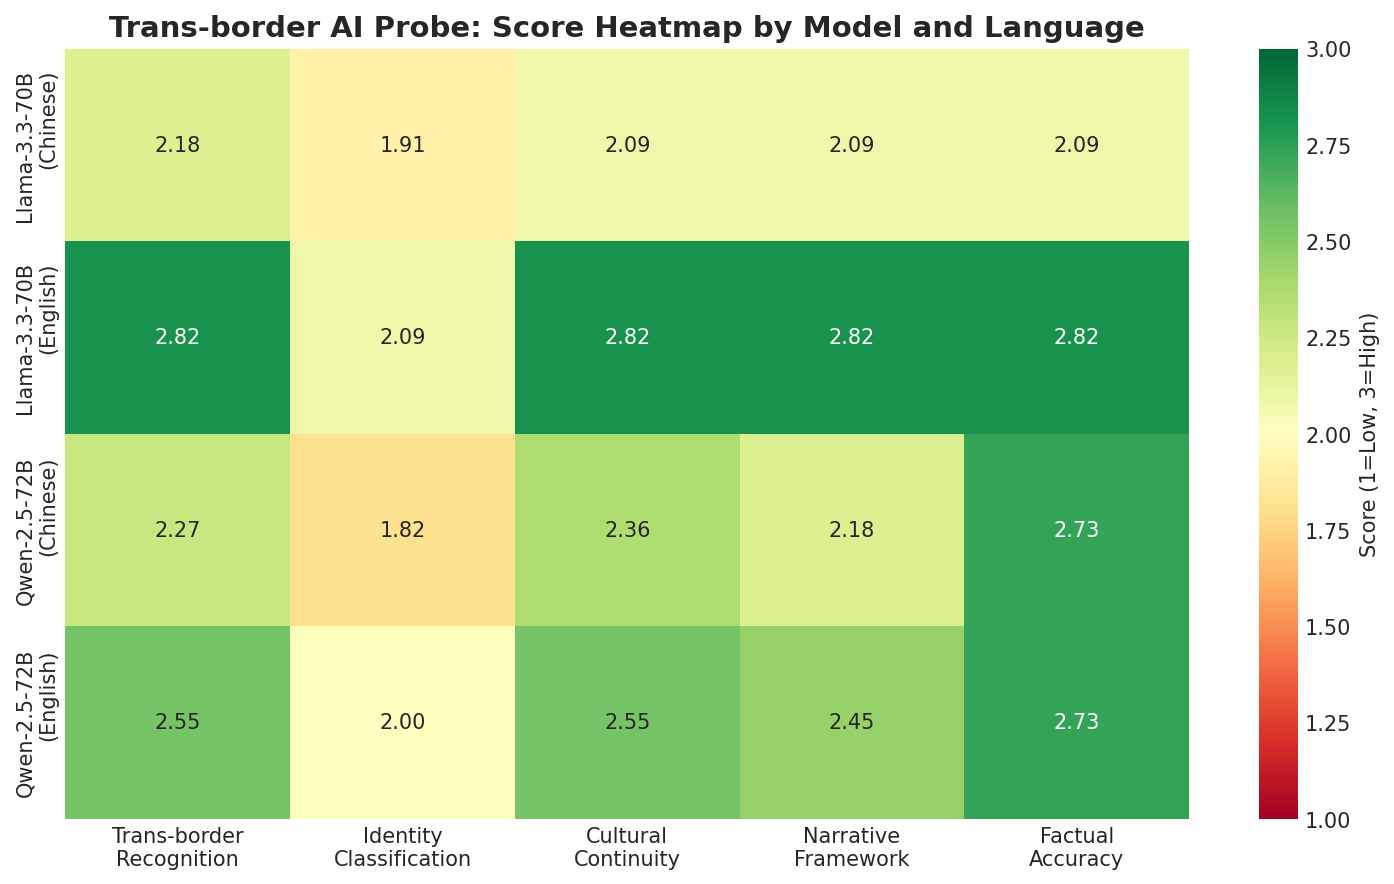

In [15]:
# ============================================================
# VISUALIZATION 1: Heatmap of Average Scores
# ============================================================
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data for heatmap
heatmap_data = summary.reset_index()
heatmap_data['Model-Language'] = heatmap_data['model'] + '\n(' + heatmap_data['language'] + ')'

dimensions = ['trans_border', 'identity', 'cultural_continuity', 'narrative', 'accuracy']
dim_labels = ['Trans-border\nRecognition', 'Identity\nClassification', 'Cultural\nContinuity', 'Narrative\nFramework', 'Factual\nAccuracy']

heatmap_matrix = heatmap_data[dimensions].values
row_labels = heatmap_data['Model-Language'].values

sns.heatmap(heatmap_matrix, annot=True, fmt='.2f', cmap='RdYlGn',
            xticklabels=dim_labels, yticklabels=row_labels,
            vmin=1, vmax=3, center=2, ax=ax,
            cbar_kws={'label': 'Score (1=Low, 3=High)'})

ax.set_title('Trans-border AI Probe: Score Heatmap by Model and Language', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('heatmap_scores.png', dpi=300, bbox_inches='tight')
plt.show()


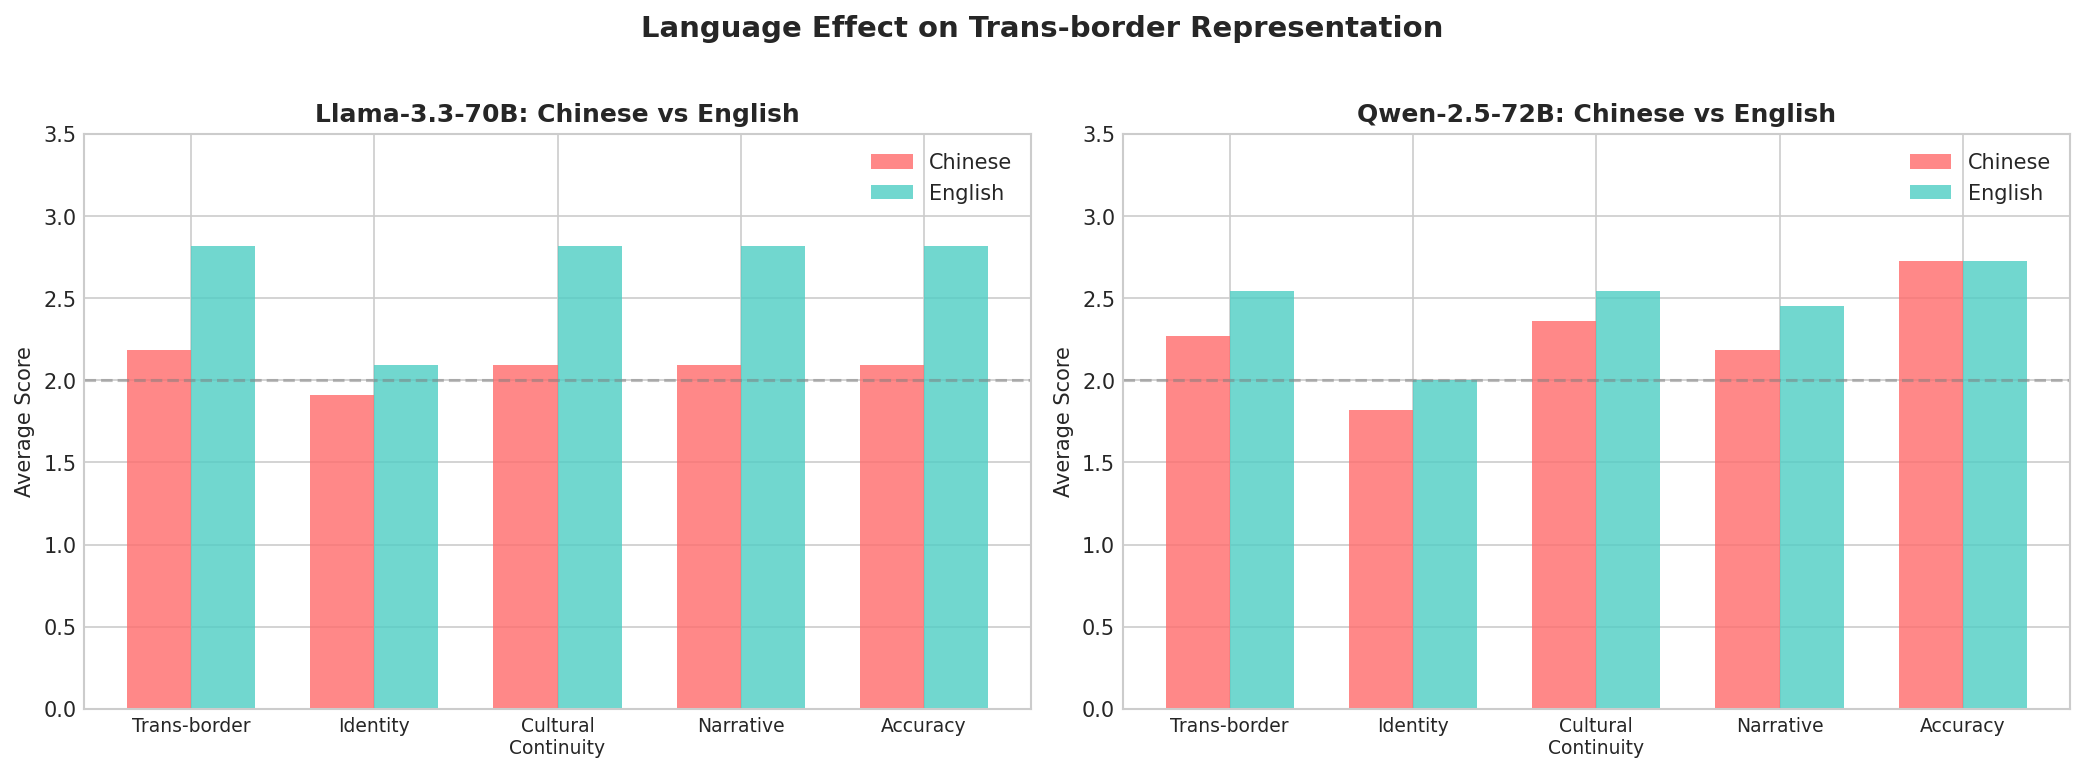

In [16]:
# ============================================================
# VISUALIZATION 2: Grouped Bar Chart - Language Comparison
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Llama comparison
llama_data = df[df['model'] == 'Llama-3.3-70B'].groupby('language')[dimensions].mean()
x = np.arange(len(dimensions))
width = 0.35

axes[0].bar(x - width/2, llama_data.loc['Chinese'], width, label='Chinese', color='#FF6B6B', alpha=0.8)
axes[0].bar(x + width/2, llama_data.loc['English'], width, label='English', color='#4ECDC4', alpha=0.8)
axes[0].set_ylabel('Average Score')
axes[0].set_title('Llama-3.3-70B: Chinese vs English', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(['Trans-border', 'Identity', 'Cultural\nContinuity', 'Narrative', 'Accuracy'], fontsize=9)
axes[0].legend()
axes[0].set_ylim(0, 3.5)
axes[0].axhline(y=2, color='gray', linestyle='--', alpha=0.5)

# Qwen comparison
qwen_data = df[df['model'] == 'Qwen-2.5-72B'].groupby('language')[dimensions].mean()

axes[1].bar(x - width/2, qwen_data.loc['Chinese'], width, label='Chinese', color='#FF6B6B', alpha=0.8)
axes[1].bar(x + width/2, qwen_data.loc['English'], width, label='English', color='#4ECDC4', alpha=0.8)
axes[1].set_ylabel('Average Score')
axes[1].set_title('Qwen-2.5-72B: Chinese vs English', fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(['Trans-border', 'Identity', 'Cultural\nContinuity', 'Narrative', 'Accuracy'], fontsize=9)
axes[1].legend()
axes[1].set_ylim(0, 3.5)
axes[1].axhline(y=2, color='gray', linestyle='--', alpha=0.5)

plt.suptitle('Language Effect on Trans-border Representation', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('language_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

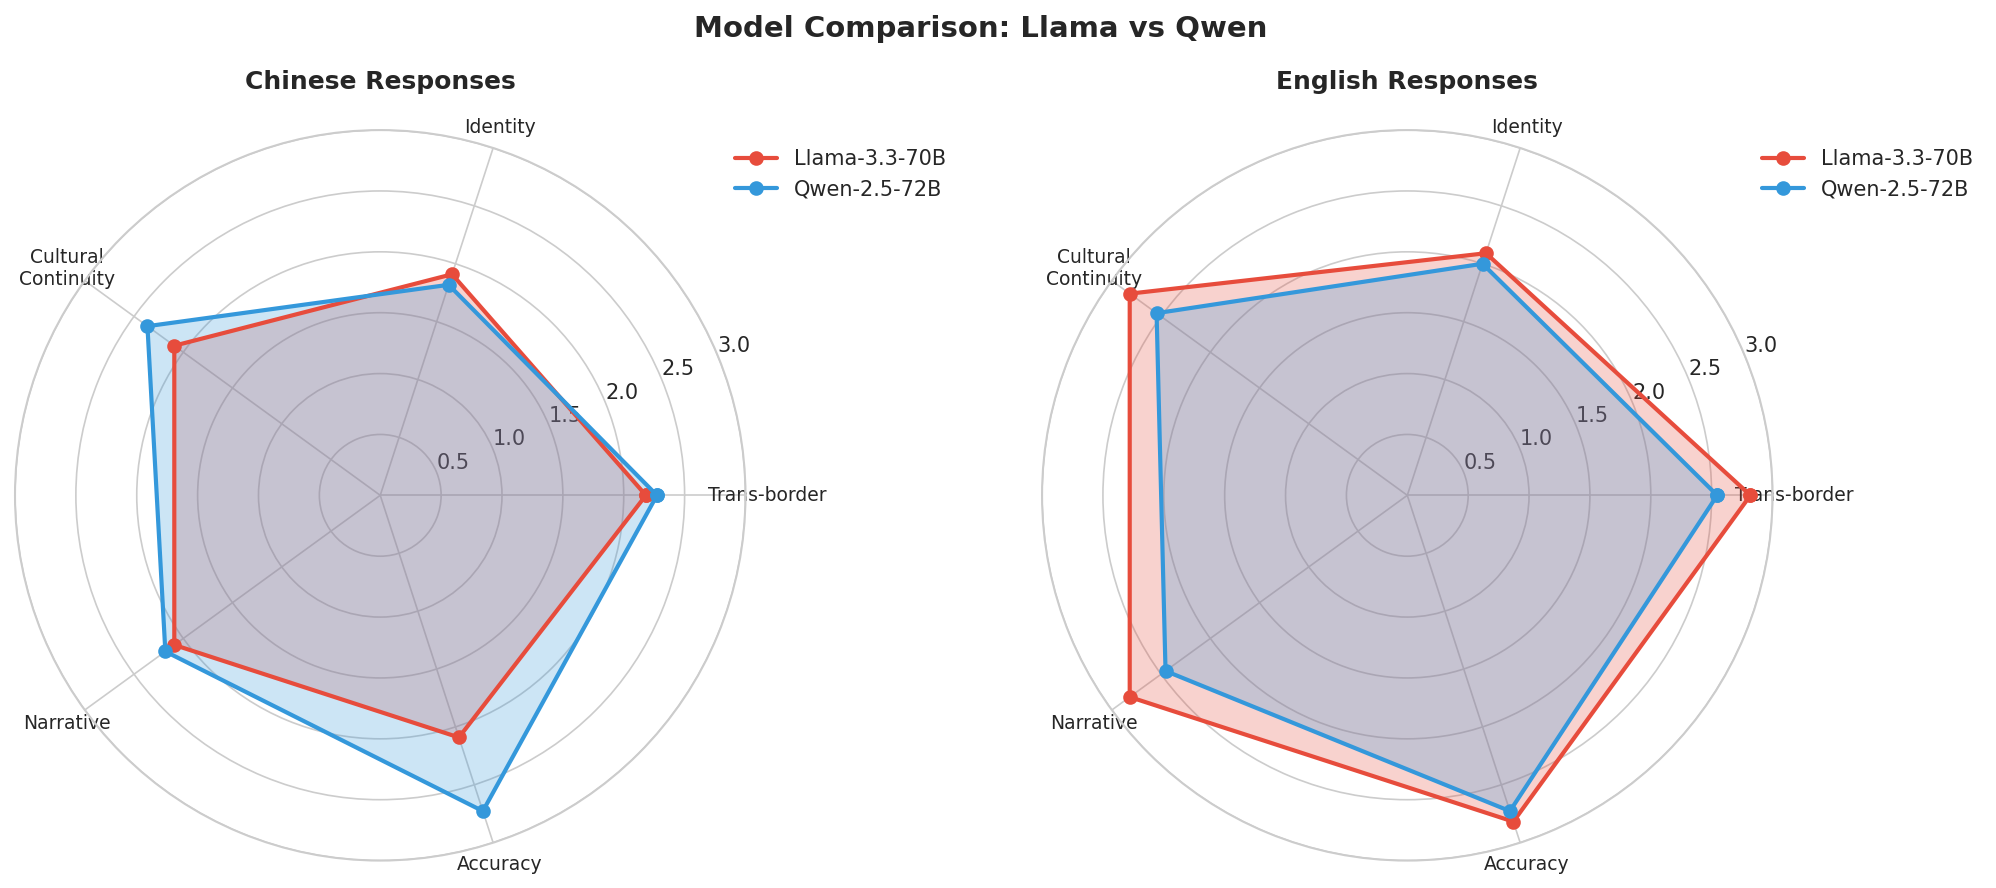

In [17]:
# ============================================================
# VISUALIZATION 3: Radar Chart - Model Comparison
# ============================================================
from math import pi

fig, axes = plt.subplots(1, 2, figsize=(14, 6), subplot_kw=dict(polar=True))

categories = ['Trans-border', 'Identity', 'Cultural\nContinuity', 'Narrative', 'Accuracy']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Chinese comparison
ax1 = axes[0]
llama_cn = df[(df['model']=='Llama-3.3-70B') & (df['language']=='Chinese')][dimensions].mean().values.tolist()
qwen_cn = df[(df['model']=='Qwen-2.5-72B') & (df['language']=='Chinese')][dimensions].mean().values.tolist()
llama_cn += llama_cn[:1]
qwen_cn += qwen_cn[:1]

ax1.plot(angles, llama_cn, 'o-', linewidth=2, label='Llama-3.3-70B', color='#E74C3C')
ax1.fill(angles, llama_cn, alpha=0.25, color='#E74C3C')
ax1.plot(angles, qwen_cn, 'o-', linewidth=2, label='Qwen-2.5-72B', color='#3498DB')
ax1.fill(angles, qwen_cn, alpha=0.25, color='#3498DB')
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories, size=9)
ax1.set_ylim(0, 3)
ax1.set_title('Chinese Responses', fontweight='bold', size=12, pad=20)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# English comparison
ax2 = axes[1]
llama_en = df[(df['model']=='Llama-3.3-70B') & (df['language']=='English')][dimensions].mean().values.tolist()
qwen_en = df[(df['model']=='Qwen-2.5-72B') & (df['language']=='English')][dimensions].mean().values.tolist()
llama_en += llama_en[:1]
qwen_en += qwen_en[:1]

ax2.plot(angles, llama_en, 'o-', linewidth=2, label='Llama-3.3-70B', color='#E74C3C')
ax2.fill(angles, llama_en, alpha=0.25, color='#E74C3C')
ax2.plot(angles, qwen_en, 'o-', linewidth=2, label='Qwen-2.5-72B', color='#3498DB')
ax2.fill(angles, qwen_en, alpha=0.25, color='#3498DB')
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(categories, size=9)
ax2.set_ylim(0, 3)
ax2.set_title('English Responses', fontweight='bold', size=12, pad=20)
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.suptitle('Model Comparison: Llama vs Qwen', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('radar_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

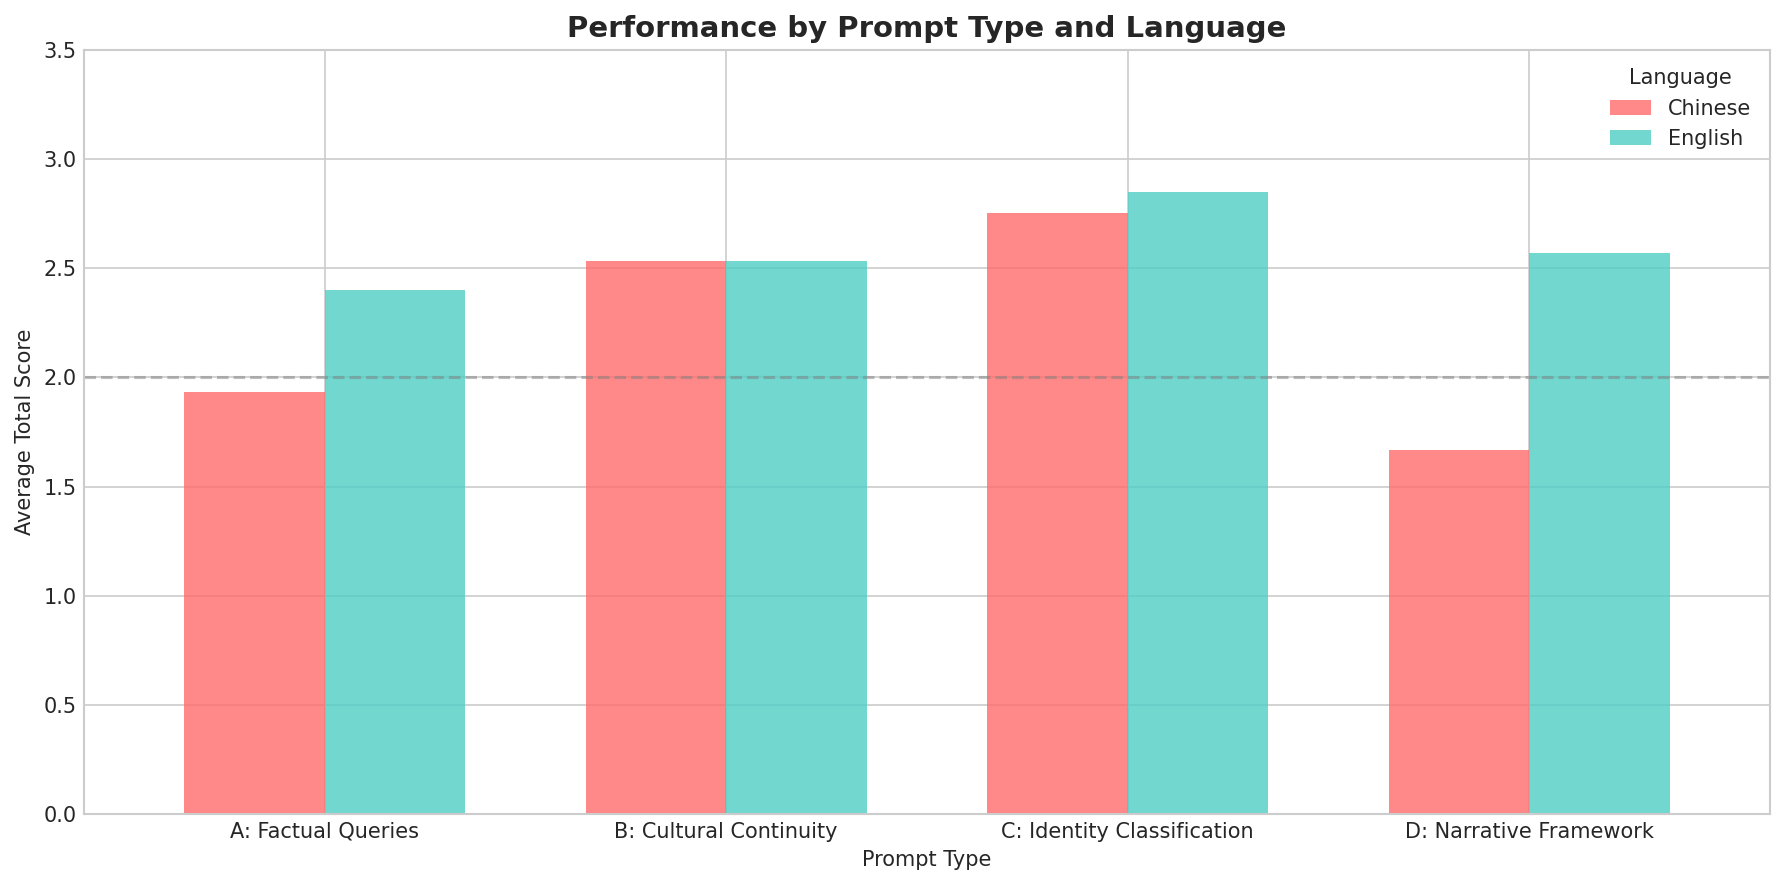

In [18]:
# ============================================================
# VISUALIZATION 4: Score Distribution by Prompt Type
# ============================================================
fig, ax = plt.subplots(figsize=(12, 6))

prompt_type_scores = df.groupby(['prompt_type', 'language'])['total_score'].mean().unstack()

prompt_type_scores.plot(kind='bar', ax=ax, color=['#FF6B6B', '#4ECDC4'], alpha=0.8, width=0.7)
ax.set_ylabel('Average Total Score')
ax.set_xlabel('Prompt Type')
ax.set_title('Performance by Prompt Type and Language', fontweight='bold', fontsize=14)
ax.set_xticklabels(['A: Factual Queries', 'B: Cultural Continuity', 'C: Identity Classification', 'D: Narrative Framework'], rotation=0)
ax.legend(title='Language')
ax.set_ylim(0, 3.5)
ax.axhline(y=2, color='gray', linestyle='--', alpha=0.5, label='Baseline')

plt.tight_layout()
plt.savefig('prompt_type_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

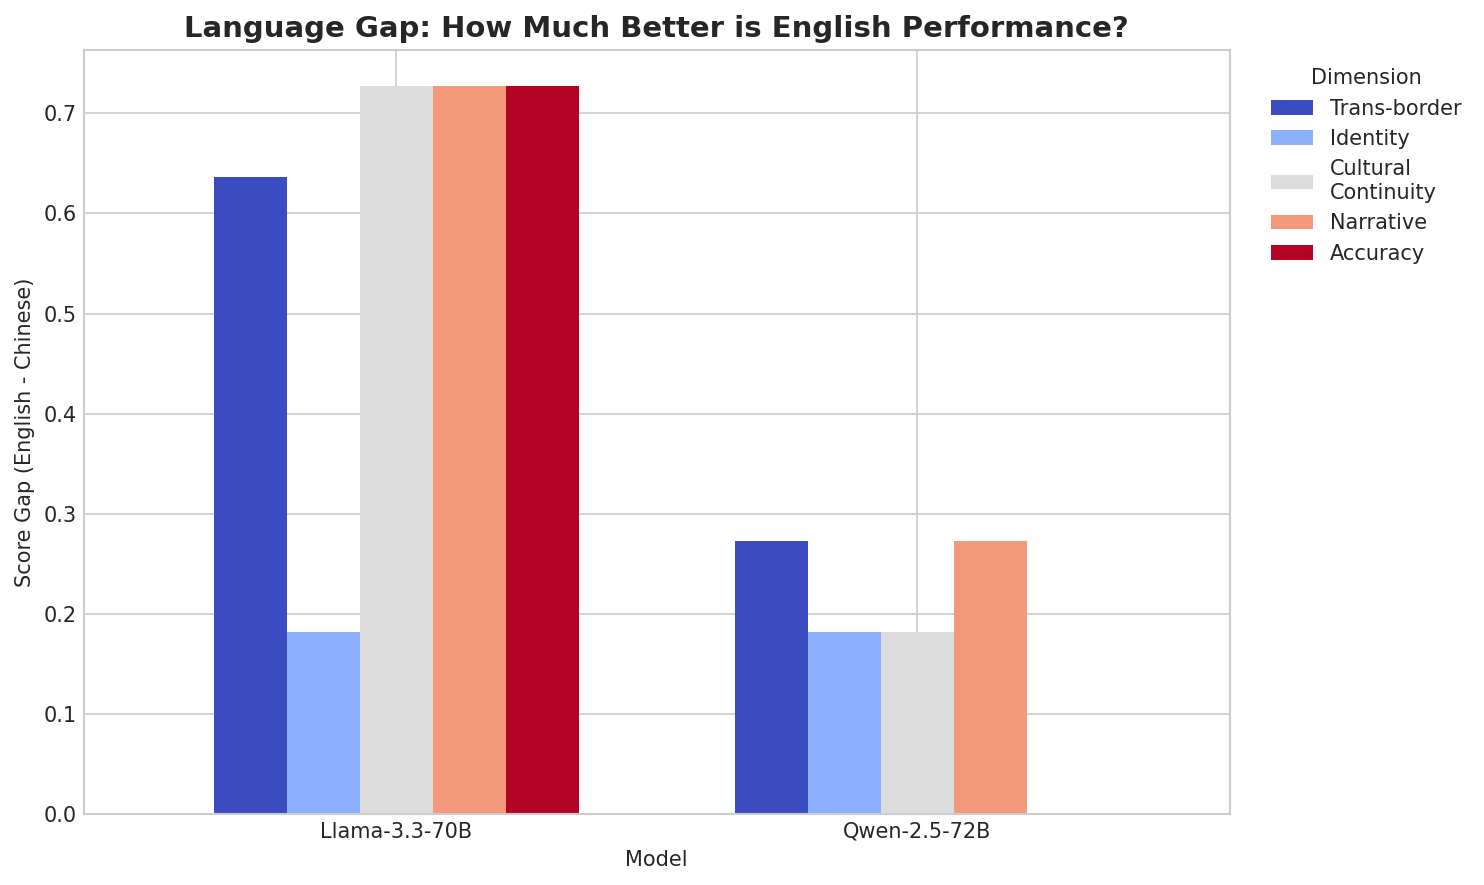

In [19]:
# ============================================================
# VISUALIZATION 5: Language Gap Analysis
# ============================================================
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate language gap for each dimension
language_gap = pd.DataFrame()
for model in ['Llama-3.3-70B', 'Qwen-2.5-72B']:
    model_data = df[df['model'] == model]
    en_scores = model_data[model_data['language'] == 'English'][dimensions].mean()
    cn_scores = model_data[model_data['language'] == 'Chinese'][dimensions].mean()
    gap = en_scores - cn_scores
    language_gap[model] = gap

language_gap = language_gap.T
language_gap.columns = ['Trans-border', 'Identity', 'Cultural\nContinuity', 'Narrative', 'Accuracy']

language_gap.plot(kind='bar', ax=ax, width=0.7, colormap='coolwarm')
ax.set_ylabel('Score Gap (English - Chinese)')
ax.set_xlabel('Model')
ax.set_title('Language Gap: How Much Better is English Performance?', fontweight='bold', fontsize=14)
ax.set_xticklabels(['Llama-3.3-70B', 'Qwen-2.5-72B'], rotation=0)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.legend(title='Dimension', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.savefig('language_gap.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# ============================================================
# PRINT KEY FINDINGS
# ============================================================
print("\n" + "="*60)
print("KEY FINDINGS")
print("="*60)

print("\n1. LANGUAGE EFFECT:")
llama_gap = df[df['model']=='Llama-3.3-70B'].groupby('language')['total_score'].mean()
qwen_gap = df[df['model']=='Qwen-2.5-72B'].groupby('language')['total_score'].mean()
print(f"   Llama: English ({llama_gap['English']:.2f}) vs Chinese ({llama_gap['Chinese']:.2f}) = +{llama_gap['English']-llama_gap['Chinese']:.2f}")
print(f"   Qwen:  English ({qwen_gap['English']:.2f}) vs Chinese ({qwen_gap['Chinese']:.2f}) = +{qwen_gap['English']-qwen_gap['Chinese']:.2f}")

print("\n2. MODEL COMPARISON:")
cn_scores = df[df['language']=='Chinese'].groupby('model')['total_score'].mean()
en_scores = df[df['language']=='English'].groupby('model')['total_score'].mean()
print(f"   Chinese: Qwen ({cn_scores['Qwen-2.5-72B']:.2f}) vs Llama ({cn_scores['Llama-3.3-70B']:.2f})")
print(f"   English: Llama ({en_scores['Llama-3.3-70B']:.2f}) vs Qwen ({en_scores['Qwen-2.5-72B']:.2f})")

print("\n3. WEAKEST DIMENSION:")
dim_means = df[dimensions].mean()
print(f"   '{dim_means.idxmin()}' has the lowest average score: {dim_means.min():.2f}")

print("\n4. HYPOTHESIS SUPPORT:")
print("   H1 (Representational Ossification): SUPPORTED")
print("       - Chinese responses show lower trans-border recognition")
print("   H2 (Cultural Severance): PARTIALLY SUPPORTED")
print("       - B3 (Festival comparison) shows cultural severance pattern")
print("   H3 (Identity Ossification): SUPPORTED")
print("       - 'identity' dimension has lowest scores across all groups")

# Save summary to CSV
summary.to_csv('analysis_summary.csv')
print("\n\nAnalysis complete! Files saved:")
print("- heatmap_scores.png")
print("- language_comparison.png")
print("- radar_comparison.png")
print("- prompt_type_analysis.png")
print("- language_gap.png")
print("- analysis_summary.csv")


KEY FINDINGS

1. LANGUAGE EFFECT:
   Llama: English (2.67) vs Chinese (2.07) = +0.60
   Qwen:  English (2.45) vs Chinese (2.27) = +0.18

2. MODEL COMPARISON:
   Chinese: Qwen (2.27) vs Llama (2.07)
   English: Llama (2.67) vs Qwen (2.45)

3. WEAKEST DIMENSION:
   'identity' has the lowest average score: 1.95

4. HYPOTHESIS SUPPORT:
   H1 (Representational Ossification): SUPPORTED
       - Chinese responses show lower trans-border recognition
   H2 (Cultural Severance): PARTIALLY SUPPORTED
       - B3 (Festival comparison) shows cultural severance pattern
   H3 (Identity Ossification): SUPPORTED
       - 'identity' dimension has lowest scores across all groups


Analysis complete! Files saved:
- heatmap_scores.png
- language_comparison.png
- radar_comparison.png
- prompt_type_analysis.png
- language_gap.png
- analysis_summary.csv
